# Fuzzy logic

Install following prerequisities:

In [2]:
# Example
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c65b3d1a024eaa8beab0ee8dada8f783de4f366a0833217a5018b4f0e4fb668b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


# Example 1

Create fuzzy sets for input variable temperature


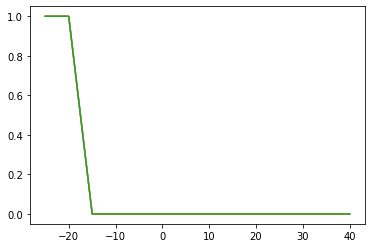

In [3]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
warm = fuzz.trapmf(temp_x, [-25, -25, -20, -15])


plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)



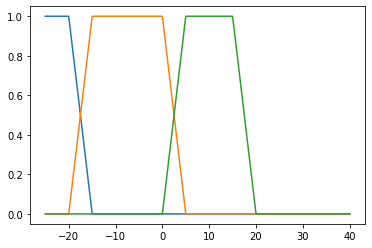

In [4]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-20, -15, 0, 5])
warm = fuzz.trapmf(temp_x, [0,5,15,20])

plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)



## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

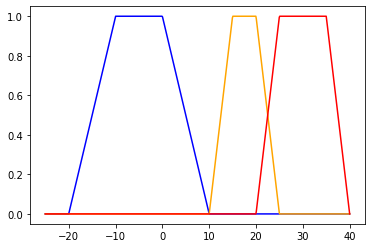

In [70]:
# Write your code here
temp_x = np.linspace(-25,40,650)

cold = fuzz.trapmf(temp_x, [-20, -10, 0, 10])
warm = fuzz.trapmf(temp_x, [10, 15, 20, 25])
hot = fuzz.trapmf(temp_x, [20,25,35,40])

plt.plot(temp_x, cold, color="blue")
plt.plot(temp_x, warm, color="orange")
plt.plot(temp_x, hot, color="red")

## Task 2

Create fuzzy sets low, medium, high for heating.

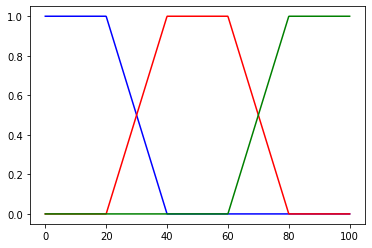

In [71]:
# Write your code here
heating_x = np.linspace(0,100,650)

low = fuzz.trapmf(heating_x, [0, 0, 20, 40])
medium = fuzz.trapmf(heating_x, [20, 40, 60, 80])
high = fuzz.trapmf(heating_x, [60,80,100,100])

plt.plot(heating_x, low, color="blue")
plt.plot(heating_x, medium, color="red")
plt.plot(heating_x, high, color="green")

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

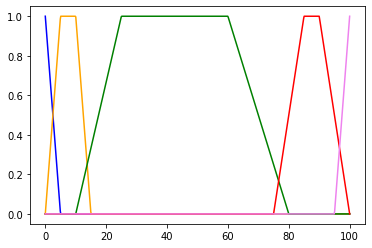

In [72]:
# Write your code here
window_x = np.linspace(0,100,650)

closed = fuzz.trapmf(window_x, [0, 0, 0, 5])
partially = fuzz.trapmf(window_x, [0, 5, 10, 15])
half = fuzz.trapmf(window_x, [10,25,60,80])
nearly = fuzz.trapmf(window_x, [75, 85, 90, 100])
open = fuzz.trapmf(window_x, [95,100,100,100])


plt.plot(window_x, closed, color="blue")
plt.plot(window_x, partially, color="orange")
plt.plot(window_x, half, color="green")
plt.plot(window_x, nearly, color="red")
plt.plot(window_x, open, color="violet")

## Task 4

According to this tutorial create fuzzy system.
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html


Create rules for our fuzzy variable window, temperature, heating and observe the fuzzy output.

In [73]:
window = ctrl.Antecedent(window_x, 'window')
heating = ctrl.Antecedent(heating_x, 'heating')
temp = ctrl.Consequent (temp_x, 'temp')

In [74]:
# Custom membership functions for window, heating and temperature
window['closed'] = closed
window['partially'] = partially
window['half'] = half
window['open'] = open

heating['low'] = low
heating['medium'] = medium
heating['high'] = high

temp['very_cold'] = very_cold
temp['cold'] = cold
temp['warm'] = warm
temp['hot'] = hot


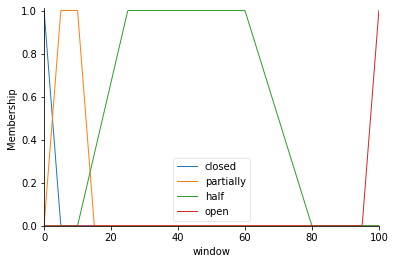

In [75]:
window.view()

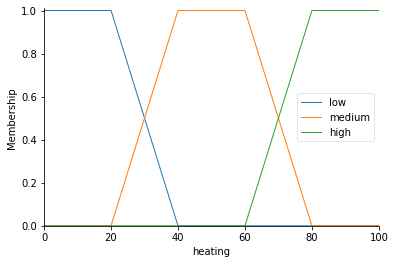

In [76]:
heating.view()

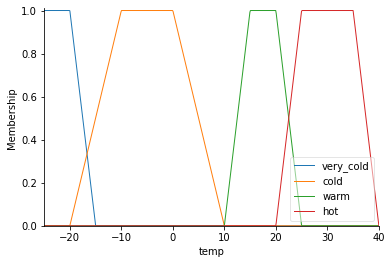

In [77]:
temp.view()

### Fuzzy Rules

1.   Rule-1: If the heating is **Low** then the temperature is **warm**

2.   Rule-2: If the heating is **High** then the temperature is **Hot**

3.   Rule-3: If the window is **Open** then the temperature is **Very Cold**

4.   Rule-4: If the window is **Closed** *or* the heating is **medium** then the temperature is **Warm**

5.   Rule-5: If the window is **Open** *and* heating is **medium** then the temperature is **Cold**

6.   Rule-6: If the window is **Half open** *and* heating is **High** then the temperature is **Warm**

7.   Rule-7: If the window is **Half open** *and* heating is **low** then the temperature is **Cold**

8.   Rule-8: If the window is **Open** *and* heating is **low** then the temperature is **Very Cold**

9.   Rule-9: If the window is **Closed** *and* heating is **High** then the temperature is **Hot**

10.  Rule-10: If the window is **Partially open** *or* heating is **medium** then the temperature is **Warm**









In [78]:
# Fuzzy rules

rule1 = ctrl.Rule(heating['low'], temp['warm'])                                # If the heating is Low then the temperature is warm
rule2 = ctrl.Rule(heating['high'], temp['hot'])                                # If the heating is High then the temperature is Hot
rule3 = ctrl.Rule(window['open'], temp['very_cold'])                           # If the window is Open then the temperature is Very Cold
rule4 = ctrl.Rule(window['closed'] | heating['medium'] , temp['warm'])         # If the window is Closed or the heating is medium then the temperature is Warm
rule5 = ctrl.Rule(window['open'] & heating['medium'] , temp['cold'])           # If the window is Open and heating is medium then the temperature is Cold          
rule6 = ctrl.Rule(window['half'] & heating['high'] , temp['warm'])             # If the window is Half open and heating is High then the temperature is Warm
rule7 = ctrl.Rule(window['half'] & heating['low'] , temp['cold'])              # If the window is Half open and heating is low then the temperature is Cold
rule8 = ctrl.Rule(window['open'] & heating['low'] , temp['very_cold'])         # If the window is Open and heating is low then the temperature is Very Cold
rule9 = ctrl.Rule(window['closed'] & heating['high'] , temp['hot'])            # If the window is Closed and heating is High then the temperature is Hot
rule10 = ctrl.Rule(window['partially'] | heating['medium'] , temp['warm'])    # If the window is Partially open or heating is medium then the temperature is Warm


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b7a4e6a00>)

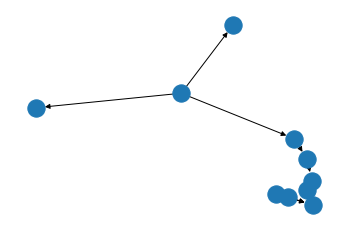

In [79]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b7a724790>)

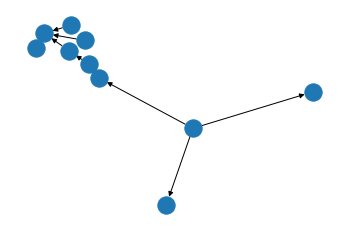

In [80]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b7a5fc340>)

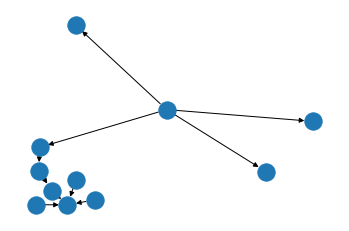

In [81]:
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b7a4c6d30>)

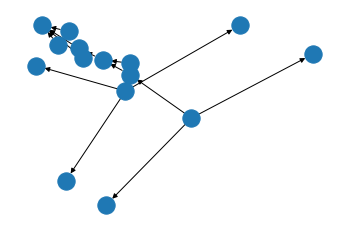

In [82]:
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b7a6ab5e0>)

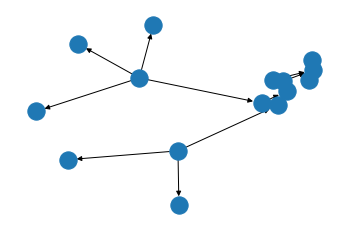

In [83]:
rule5.view()

In [94]:
# Creation of Control system for temperature
temp_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

# Simulation of Control system
temp_sim = ctrl.ControlSystemSimulation(temp_ctrl)
temp_sim.input['window'] = 0
temp_sim.input['heating'] = 50

temp_sim.compute()

print (temp_sim.output['temp'])

17.499952443455268


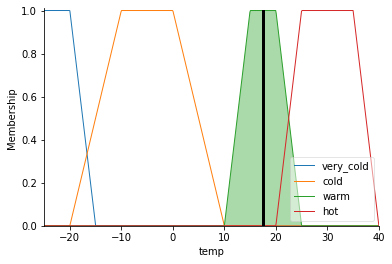

In [95]:
temp.view(sim=temp_sim)